# Objectives:
    
a. Perform an exploratory investigation of the data. Identify one or two trends in the data that are interesting from a data perspective.

        -Do the trends you observe have any effect on how you would build your ranking feature?
        -Are there any inconsistencies in the data that could have any effect on how you would build your ranking feature?  
        -How would you communicate these findings to a non-technical project manager?

b. How much web traffic are users' profiles receiving from internal and external sources? Is it reasonable to include both data sources in the product feature?

c.  Generate a ranking for profile views. How would you present the profile view data for a "Rank for Profile Views" feature?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None

import sklearn as sk

Assumption made is that below DF's are up-to-date dumps of the tables shown in the database schema.

In [2]:
titles_df = pd.DataFrame(np.array([[2, 'Assistant Professor'], [1, 'Full professor'], [6, 'Other'], [3, 'Postdoctoral assistant'], [5, 'Student']]), columns=['id', 'title'])
titles_df['id'] = titles_df['id'].astype(int)
titles_df

,id,title
0,2,Assistant Professor
1,1,Full professor
2,6,Other
3,3,Postdoctoral assistant
4,5,Student


In [3]:
users_df = pd.read_csv('http://hrcdn.net/s3_pub/istreet-assets/XU-eVWAH43QNpS0y5YfYow/users.csv')

In [4]:
user_profile_urls_df = pd.read_csv('http://hrcdn.net/s3_pub/istreet-assets/ZJP4_K3y3b-Mh7FvwjLhUA/user_profile_urls.csv')

In [5]:
internal_profile_views_df = pd.read_csv('http://hrcdn.net/s3_pub/istreet-assets/P0nIDnNJq8dA-l-E4w4QgQ/internal_profile_views.csv')

In [6]:
external_profile_views_df = pd.read_csv('http://hrcdn.net/s3_pub/istreet-assets/tE7PDLQbw_chlLTwRUI_Cw/external_profile_views.csv')

Some preliminary EDA such as size, data type and content of each of the above DF's.

In [7]:
titles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
id       5 non-null int32
title    5 non-null object
dtypes: int32(1), object(1)
memory usage: 188.0+ bytes


In [8]:
titles_df

,id,title
0,2,Assistant Professor
1,1,Full professor
2,6,Other
3,3,Postdoctoral assistant
4,5,Student


In [9]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 6 columns):
id           600000 non-null int64
firstname    600000 non-null object
lastname     600000 non-null object
age          600000 non-null int64
region       600000 non-null object
title_id     600000 non-null int64
dtypes: int64(3), object(3)
memory usage: 27.5+ MB


In [10]:
users_df.head()

,id,firstname,lastname,age,region,title_id
0,10038,Ida,Slostad,20,South,5
1,10039,David,Brown,36,Northeast,5
2,10040,Jack,Alcorn,60,Northeast,5
3,10041,Julie,Fremont,48,Other,6
4,10042,Trent,Long,32,Northeast,3


In [11]:
user_profile_urls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 3 columns):
id             600000 non-null int64
user_id        600000 non-null int64
profile_url    600000 non-null object
dtypes: int64(2), object(1)
memory usage: 13.7+ MB


In [12]:
user_profile_urls_df.head()

,id,user_id,profile_url
0,1,10038,/pub/ida-slostad
1,2,10039,/pub/david-brown
2,3,10040,/pub/jack-alcorn
3,4,10041,/pub/julie-fremont
4,5,10042,/cv/trent-long


In [13]:
internal_profile_views_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10806 entries, 0 to 10805
Data columns (total 4 columns):
id                10806 non-null int64
user_id           10806 non-null int64
viewed_user_id    10806 non-null int64
created_at        10806 non-null object
dtypes: int64(3), object(1)
memory usage: 337.8+ KB


In [14]:
internal_profile_views_df.head()

,id,user_id,viewed_user_id,created_at
0,6997,10056,2202188,2014-01-01 12:11:09
1,3177,10112,116842,2014-01-01 18:56:17
2,4534,10126,1959444,2014-01-01 02:31:26
3,9207,10298,728722,2014-01-01 12:22:53
4,6477,10324,586110,2014-01-01 09:18:52


In [15]:
external_profile_views_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335636 entries, 0 to 335635
Data columns (total 3 columns):
id                    335636 non-null int64
public_profile_url    335636 non-null object
unique_PageViews      335636 non-null int64
dtypes: int64(2), object(1)
memory usage: 7.7+ MB


In [16]:
external_profile_views_df.head()

,id,public_profile_url,unique_PageViews
0,1,/pub/david-brown-ms,1
1,2,/pub/julie-fremont-ms,1
2,3,/cv/tara-cutler,5
3,4,/pub/michael-morrell-ms,14
4,5,/cv/daniel-paterniti,1


Check for any null values that can throw off data integrity and data calulations.

In [17]:
titles_df.isnull().sum(), users_df.isnull().sum(),user_profile_urls_df.isnull().sum(), internal_profile_views_df.isnull().sum(),external_profile_views_df.isnull().sum()

(id       0
 title    0
 dtype: int64, id           0
 firstname    0
 lastname     0
 age          0
 region       0
 title_id     0
 dtype: int64, id             0
 user_id        0
 profile_url    0
 dtype: int64, id                0
 user_id           0
 viewed_user_id    0
 created_at        0
 dtype: int64, id                    0
 public_profile_url    0
 unique_PageViews      0
 dtype: int64)

Great! There are no NaN's in any of the DF's.

# a) Two interesting trends in data that are interesting from data perspective.

In order to determine what trends to dig deep into, need to get an intial look at what trends there are. I will be exploring frequency counts from age, region, titles, internal profile views and external profile views. Keep in mind that these are overall counts (everyone, not just internal users using the platform). So data is not broken up into cohorts such as internal vs. external views, users vs. viewed profile users yet. These will be explored later on in this notebook.

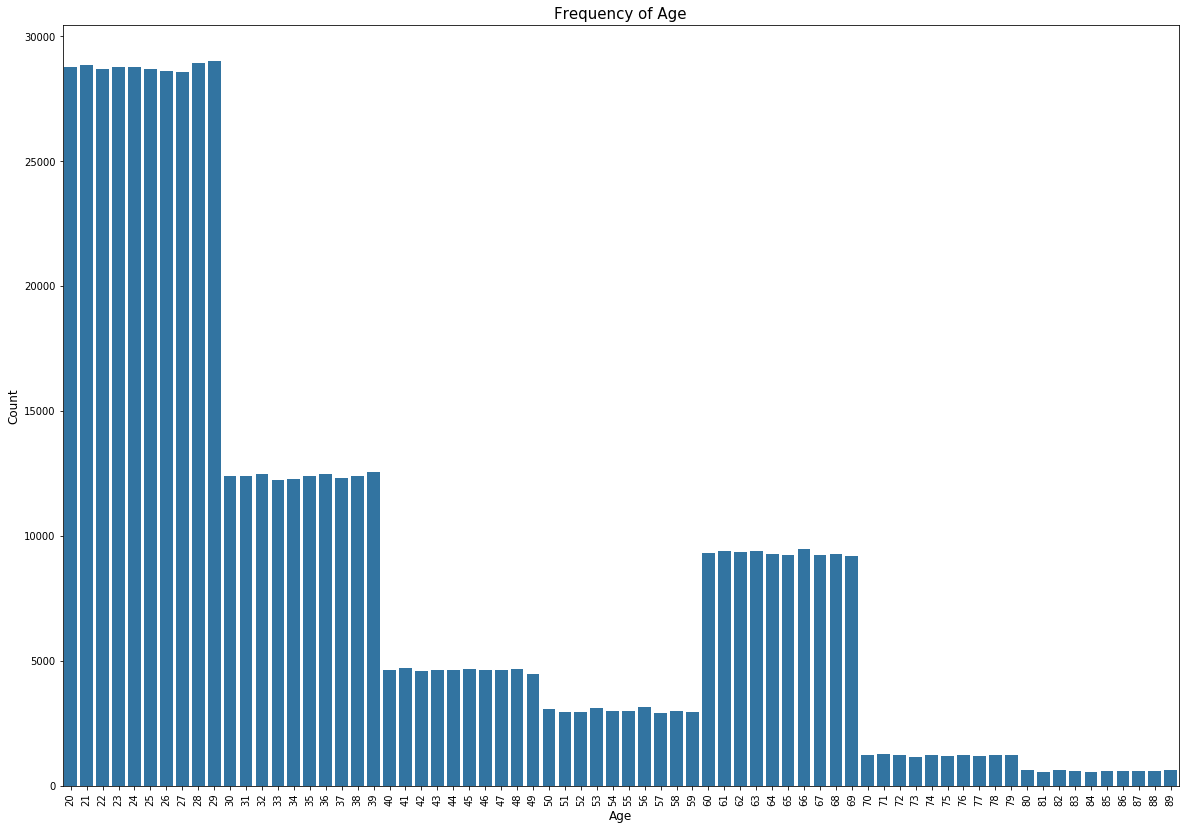

In [18]:
plt.figure(figsize=(20,14))
sns.countplot(x='age', data=users_df,color=color[0])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Age', fontsize=12)
plt.xticks(rotation='vertical')
plt.title('Frequency of Age', fontsize=15)
plt.show()

From the data we have, most users are **<30 years** of age, with those in their 30's right behind and in 3rd place are those in their 60's. Another interesting observation here is that each decade has very similar accounts across each year within that decade.

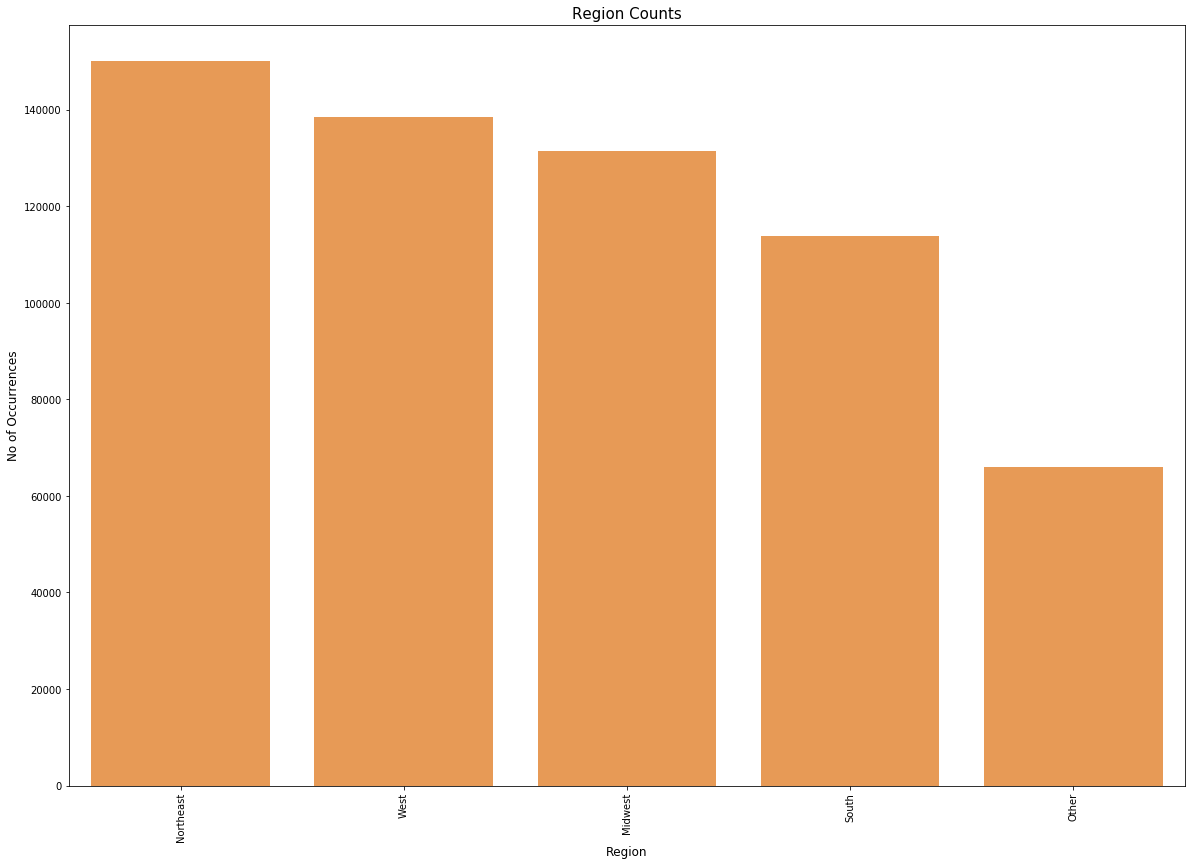

In [19]:
reg_cnt = users_df.region.value_counts()

plt.figure(figsize = (20,14))
sns.barplot(reg_cnt.index, reg_cnt.values, alpha=0.8, color = color[1])
plt.ylabel('No of Occurrences', fontsize=12)
plt.xlabel('Region', fontsize=12)
plt.title('Region Counts', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

Highest amount of users come from **Northeastern** part of US. At the same time, the West, Midwest and South are not too far away.

In order to do further counts, need to merge some tables together to get a bigger overview of relationships within user data.

In [20]:
users = pd.merge(users_df, user_profile_urls_df, left_on='id', right_on='user_id', how='inner')
users = pd.merge(users, titles_df, left_on='title_id', right_on='id', how='left')
users = pd.merge(users, internal_profile_views_df, left_on='id_x', right_on='user_id', how='left')
users.head()

,id_x,firstname,lastname,age,region,title_id,id_y,user_id_x,profile_url,id_x,title,id_y,user_id_y,viewed_user_id,created_at
0,10038,Ida,Slostad,20,South,5,1,10038,/pub/ida-slostad,5,Student,NaN,NaN,NaN,NaN
1,10039,David,Brown,36,Northeast,5,2,10039,/pub/david-brown,5,Student,NaN,NaN,NaN,NaN
2,10040,Jack,Alcorn,60,Northeast,5,3,10040,/pub/jack-alcorn,5,Student,NaN,NaN,NaN,NaN
3,10041,Julie,Fremont,48,Other,6,4,10041,/pub/julie-fremont,6,Other,NaN,NaN,NaN,NaN
4,10042,Trent,Long,32,Northeast,3,5,10042,/cv/trent-long,3,Postdoctoral assistant,NaN,NaN,NaN,NaN


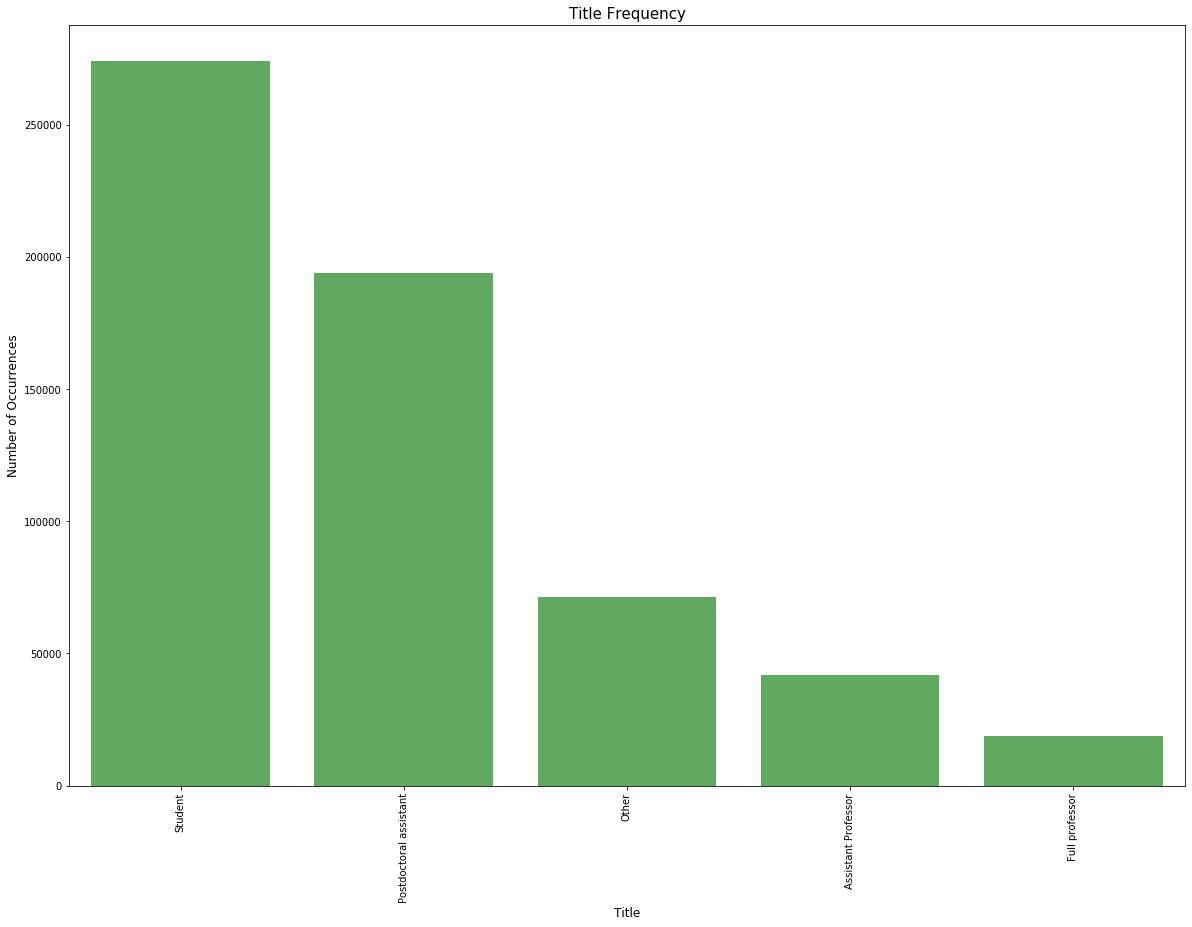

In [21]:
titles_cnt = users.title.value_counts()

plt.figure(figsize=(20,14))
sns.barplot(titles_cnt.index, titles_cnt.values, alpha=0.8, color=color[2])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Title', fontsize=12)
plt.title('Title Frequency', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

Top users are **Students and Postdoctoral assistants**.

All data exploration is with the assumption that this data is comprehensive, a good sample size for the task at hand.

Trends to Explore:

1.) It would be nice to compare demographics between users who viewed profiles and viewed profiles' users. This would give insight on how to improve engagement within network for those looking to make connections as well as those wanting to get more hits on their profile page. 

2.) On top of this, comparing member profile page hits versus search engine profile hits would be nice exploration in what is driving activity on platform (membership/external interactions). 

Let's start with some **cohort analysis** as mentioned earlier we would do.

## 1) User Demographics: users who viewed profiles (users) vs. viewed profiles' users (viewed users)

Starting off with creating two different tables: (users) demographics vs. (viewed_users) demographics.

In [22]:
users2 = pd.merge(users_df, user_profile_urls_df, left_on='id', right_on='user_id', how='inner')
users2 = pd.merge(users2, titles_df, left_on='title_id', right_on='id', how='left')
users2 = pd.merge(users2, internal_profile_views_df, left_on='id_x', right_on='user_id', how='inner')
users2.head() 

,id_x,firstname,lastname,age,region,title_id,id_y,user_id_x,profile_url,id_x,title,id_y,user_id_y,viewed_user_id,created_at
0,10056,Patti,Pistilli,30,West,6,19,10056,/pub/patti-pistilli,6,Other,6997,10056,2202188,2014-01-01 12:11:09
1,10112,Carlos,Gonzales,30,South,3,69,10112,/cv/carlos-gonzales,3,Postdoctoral assistant,3177,10112,116842,2014-01-01 18:56:17
2,10126,Scotty,Dunson,27,Other,5,83,10126,/cv/scotty-dunson,5,Student,4534,10126,1959444,2014-01-01 02:31:26
3,10298,Dale,Walls,61,Other,3,193,10298,/cv/dale-walls,3,Postdoctoral assistant,9207,10298,728722,2014-01-01 12:22:53
4,10324,Raymond,Dews,23,Midwest,5,213,10324,/pub/raymond-dews,5,Student,6477,10324,586110,2014-01-01 09:18:52


In [23]:
viewed_users = pd.merge(users_df, user_profile_urls_df, left_on='id', right_on='user_id', how='inner')
viewed_users = pd.merge(viewed_users, titles_df, left_on='title_id', right_on='id', how='left')
viewed_users = pd.merge(viewed_users, internal_profile_views_df, left_on='id_x', right_on='viewed_user_id', how='inner')
viewed_users.head() 

,id_x,firstname,lastname,age,region,title_id,id_y,user_id_x,profile_url,id_x,title,id_y,user_id_y,viewed_user_id,created_at
0,10058,Nina,Loera,73,South,3,21,10058,/pub/nina-loera,3,Postdoctoral assistant,6680,4185263,10058,2014-01-01 10:26:22
1,10103,Veronica,Sauer,64,Midwest,3,60,10103,/pub/veronica-sauer,3,Postdoctoral assistant,5870,3162674,10103,2014-01-01 05:58:15
2,10419,Eric,Bender,37,South,1,301,10419,/cv/eric-bender,1,Full professor,3029,2252759,10419,2014-01-01 18:10:06
3,10419,Eric,Bender,37,South,1,301,10419,/cv/eric-bender,1,Full professor,1026,3341405,10419,2014-01-01 06:53:05
4,10610,Marc,Hickman,28,Northeast,3,449,10610,/pub/marc-hickman,3,Postdoctoral assistant,5436,1382250,10610,2014-01-01 03:24:49


Not let us look at how age can be distributed differently between 2 different cohorts.

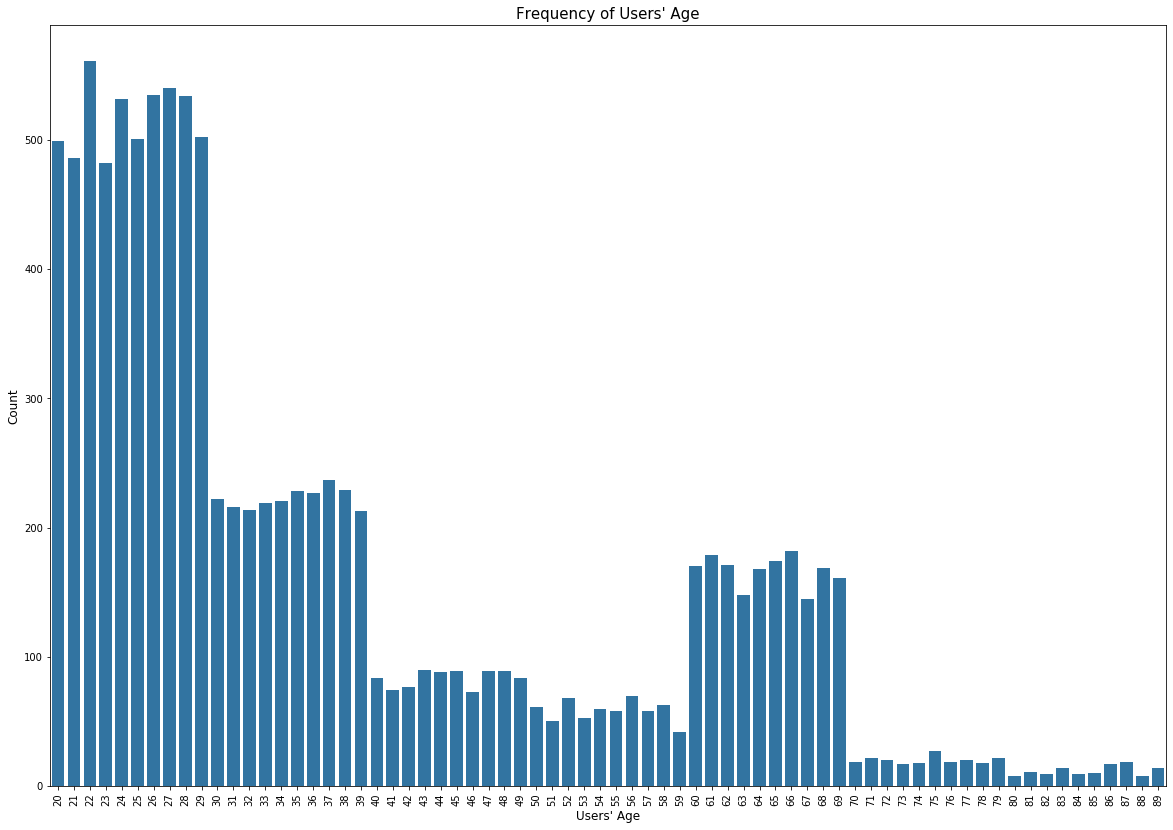

In [24]:
plt.figure(figsize=(20,14))
sns.countplot(x='age', data=users2,color=color[0])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Users\' Age', fontsize=12)
plt.xticks(rotation='vertical')
plt.title('Frequency of Users\' Age', fontsize=15)
plt.show()

Most users are in their **20's**, then 30's and 60's. 

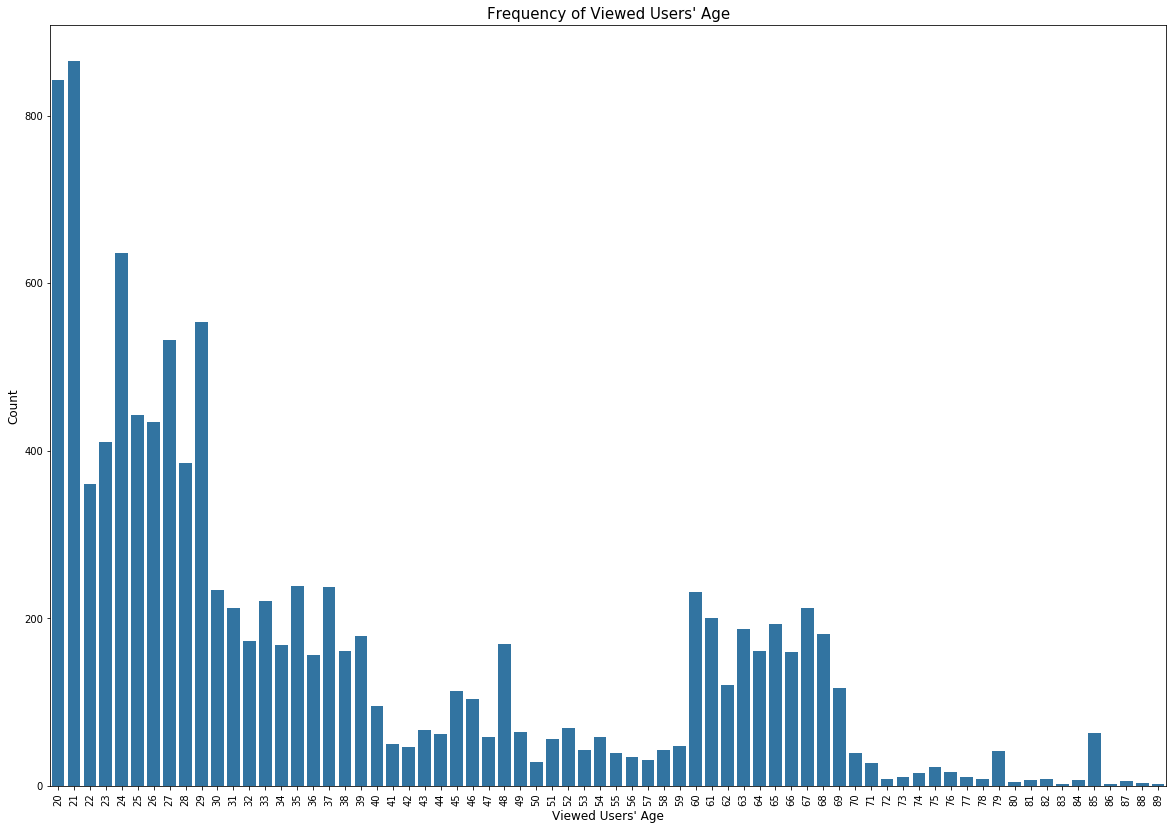

In [25]:
plt.figure(figsize=(20,14))
sns.countplot(x='age', data=viewed_users,color=color[0])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Viewed Users\' Age', fontsize=12)
plt.xticks(rotation='vertical')
plt.title('Frequency of Viewed Users\' Age', fontsize=15)
plt.show()

Users with profile views have less structured groupings as seen in overall and users' age frequency plots. This is interesting because those that are receving profile views come from a **variety of ages within 20's, 30's and 60's decades**.

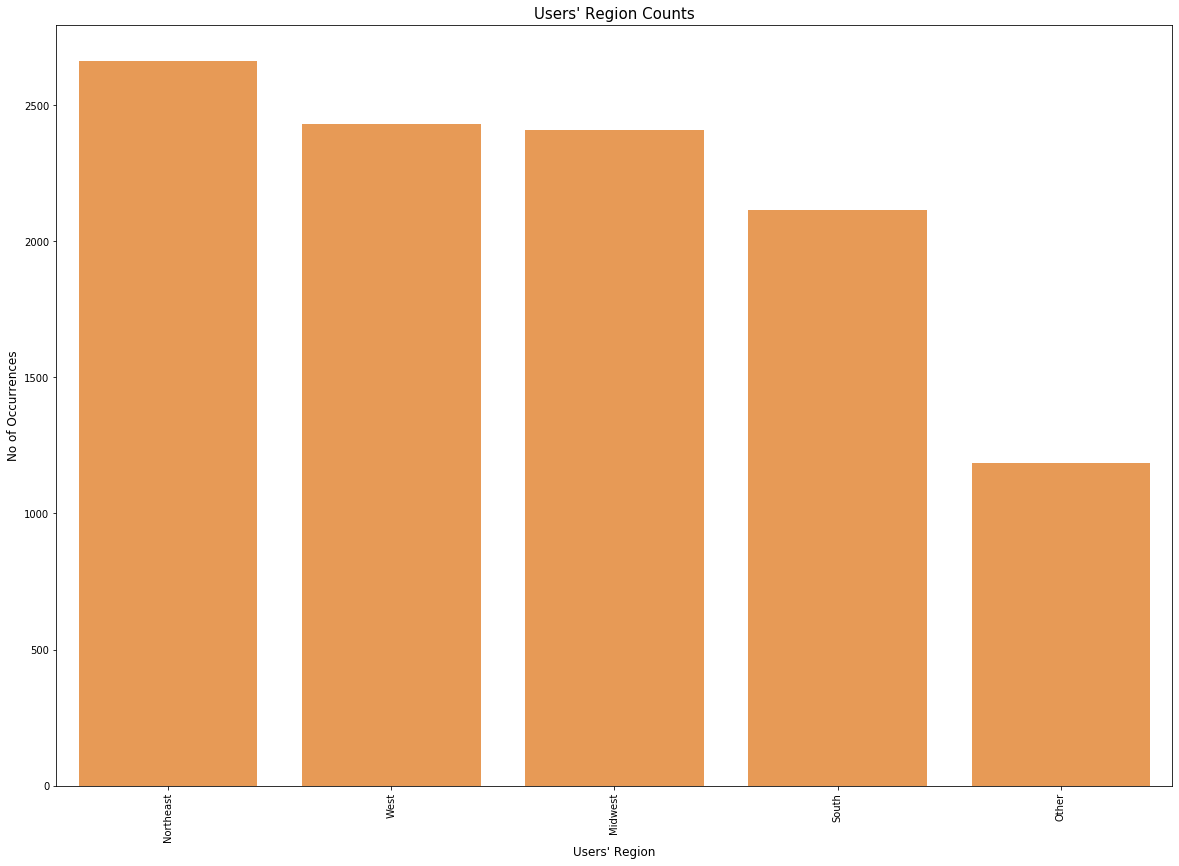

In [26]:
reg_cnt = users2.region.value_counts()

plt.figure(figsize = (20,14))
sns.barplot(reg_cnt.index, reg_cnt.values, alpha=0.8, color = color[1])
plt.ylabel('No of Occurrences', fontsize=12)
plt.xlabel('Users\' Region', fontsize=12)
plt.title('Users\' Region Counts', fontsize=15)
plt.xticks(rotation='vertical')
plt.show() 

Once again, the frequency count trend for users' region is **similar** to the frequency count trend for overall region.

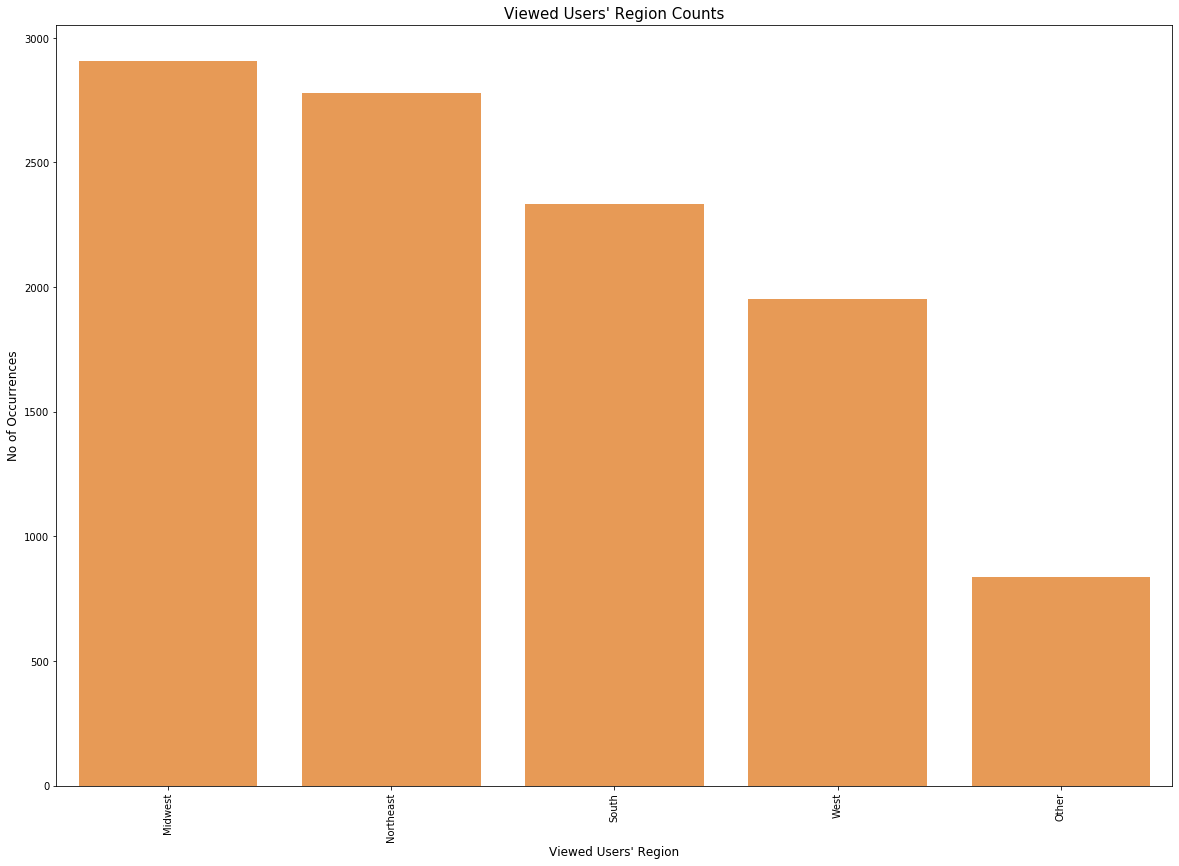

In [27]:
reg_cnt = viewed_users.region.value_counts()

plt.figure(figsize = (20,14))
sns.barplot(reg_cnt.index, reg_cnt.values, alpha=0.8, color = color[1])
plt.ylabel('No of Occurrences', fontsize=12)
plt.xlabel('Viewed Users\' Region', fontsize=12)
plt.title('Viewed Users\' Region Counts', fontsize=15)
plt.xticks(rotation='vertical')
plt.show() 

The distribution here is different because for Viewed Users, most of them are not coming from the Northeast, but rather from the Midwest. Northeast falls to second place. And instead of the **Midwest being in third place, it is in first place**. And the West goes from second to second to the last place.

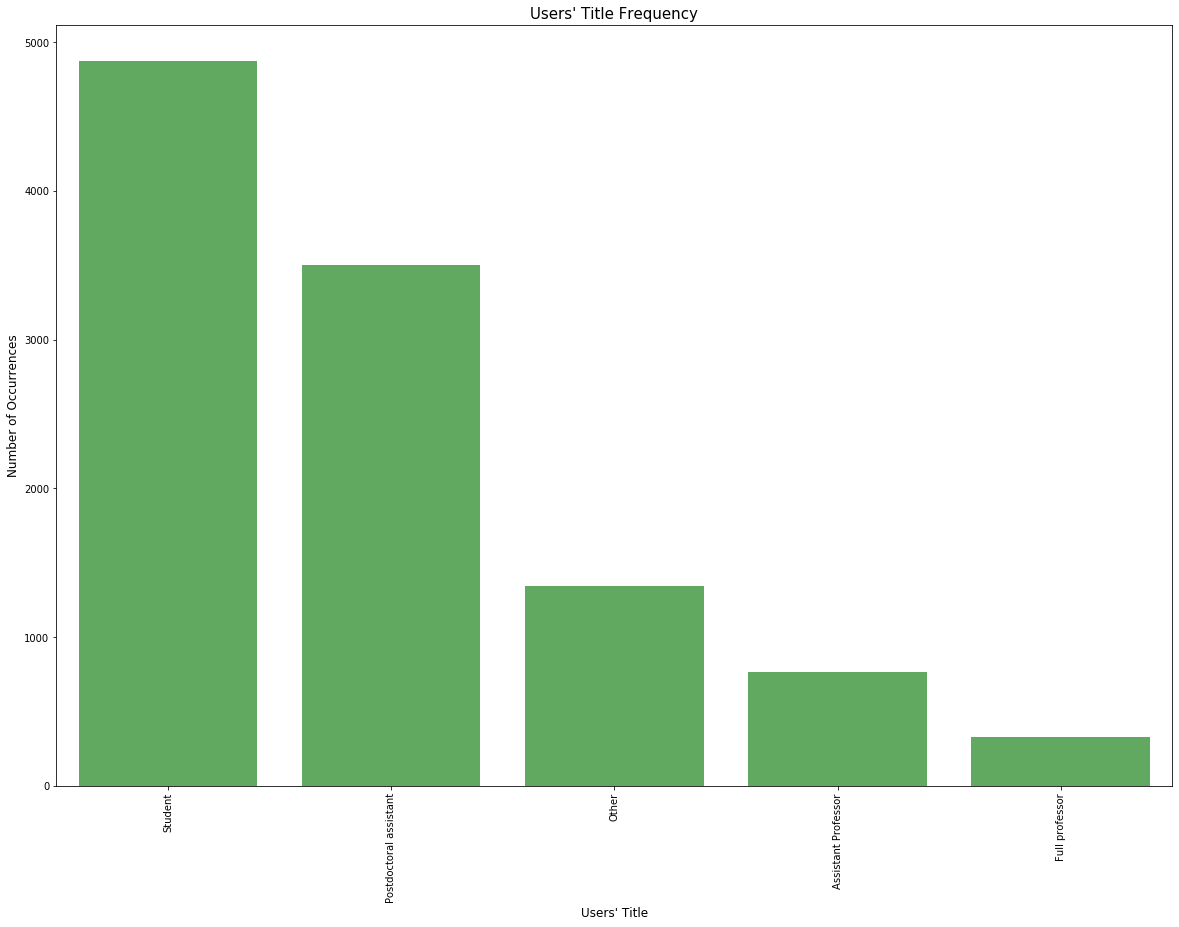

In [28]:
titles_cnt = users2.title.value_counts()

plt.figure(figsize=(20,14))
sns.barplot(titles_cnt.index, titles_cnt.values, alpha=0.8, color=color[2])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Users\' Title', fontsize=12)
plt.title('Users\' Title Frequency', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

Users' group has the **same titles** in descending order even though frequencies are not exact. However, the **majority is still Students**. 

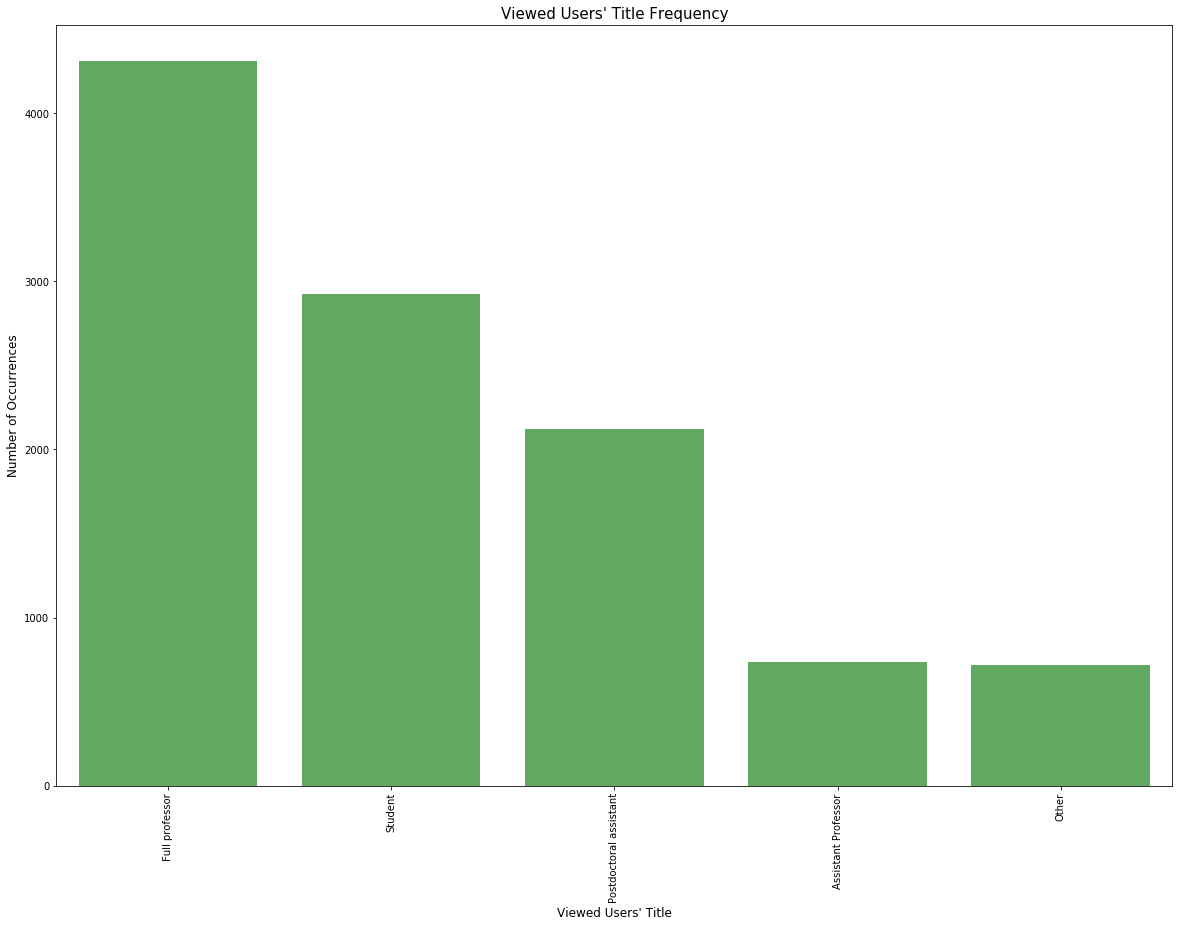

In [29]:
titles_cnt = viewed_users.title.value_counts()

plt.figure(figsize=(20,14))
sns.barplot(titles_cnt.index, titles_cnt.values, alpha=0.8, color=color[2])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Viewed Users\' Title', fontsize=12)
plt.title('Viewed Users\' Title Frequency', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

On the other hand, Viewed Users are majority Full professors that bumped Student and Postdoctoral assistant to second and third place. Another interesting observation is that Other got bumped to last place when it was third place in Users' title frequency count. 

It makes sense that Full professor is the most viewed profile since the most popular users are Students, who usually are interested in their professors' credentials.

## 2) Profile views: Internal vs. External

In [30]:
#Internal
viewed_cnt = users['viewed_user_id'].value_counts().reset_index().head(20)
viewed_cnt.columns = ['viewed_user_id', 'frequency_count']
viewed_cnt

,viewed_user_id,frequency_count
0,1740253.0,406
1,2185215.0,383
2,2632343.0,180
3,3086119.0,88
4,1287442.0,88
5,2460133.0,82
6,979614.0,68
7,218859.0,67
8,314218.0,61
9,2864377.0,47


Within network, there are definitely some top profiles. In particular, the top 3 that are in the **180-406 range**.

In [31]:
#Also, let us see in more detail who these top 3 are (age, region in US they come from.)
viewed_users.loc[viewed_users['viewed_user_id'] == 1740253].head(1) #20 years old and from Northeast

,id_x,firstname,lastname,age,region,title_id,id_y,user_id_x,profile_url,id_x,title,id_y,user_id_y,viewed_user_id,created_at
4425,1740253,Tommy,Proulx,20,Northeast,1,249231,1740253,/cv/tommy-proulx,1,Full professor,1994,10482,1740253,2014-01-01 12:23:45


In [32]:
viewed_users.loc[viewed_users['viewed_user_id'] == 2185215].head(1) #21 years old and from Midwest

,id_x,firstname,lastname,age,region,title_id,id_y,user_id_x,profile_url,id_x,title,id_y,user_id_y,viewed_user_id,created_at
5777,2185215,Adam,Towns,21,Midwest,1,309303,2185215,/pub/adam-towns,1,Full professor,4032,17246,2185215,2014-01-01 23:36:28


In [33]:
viewed_users.loc[viewed_users['viewed_user_id'] == 2632343].head(1) #24 years old and from South

,id_x,firstname,lastname,age,region,title_id,id_y,user_id_x,profile_url,id_x,title,id_y,user_id_y,viewed_user_id,created_at
7093,2632343,Diane,Holland,24,South,1,368921,2632343,/pub/diane-holland,1,Full professor,2919,35146,2632343,2014-01-01 17:33:35


So the top 3 most viewed user profiles are **between 20 and 24 years of age** and come from all over: **Northeast, Midwest and the South.**

In [34]:
#Check to see if all public_profile_url's are unique
#Original DF size is: 335,636
#Unique public_profile_url's:
external_profile_views_df['public_profile_url'].nunique()

335636

All rows in external_profile_views are unique. Now we can sort unique_PageViews column to see top viewed public_profile_url's.

In [35]:
#External
external_profile_views_df.nlargest(20, 'unique_PageViews')

,id,public_profile_url,unique_PageViews
248373,248374,/pub/patricia-valenzuela,1124
23582,23583,/cv/dana-oliveros-ms,1086
249587,249588,/cv/clayton-ritchie,764
222280,222281,/cv/ernestine-lusk-phd,593
207890,207891,/cv/bobbie-banks-phd,563
293232,293233,/cv/jose-vawter,506
233689,233690,/pub/peter-montgomery,496
141101,141102,/cv/christopher-cromwell-ms,461
262779,262780,/pub/lauren-erickson-ms,445
196105,196106,/cv/daniel-reilly-phd,435


There are 3 top public profiles that are in the **764-1124 range**. This is definitly higher number occurence than within network profile hits. At the same time, this is expected since the network is exclusive and profile hits coming from general public are from a larger user base.

We can see here what the frequency is of viewed profiles from external web traffic. Let's see some demographics from these users.

In [36]:
ext_viewed_users = pd.merge(users_df, user_profile_urls_df, left_on='id', right_on='user_id', how='inner')
ext_viewed_users = pd.merge(ext_viewed_users, titles_df, left_on='title_id', right_on='id', how='left')
ext_viewed_users = pd.merge(ext_viewed_users, external_profile_views_df, left_on='profile_url', right_on='public_profile_url', how='inner')
ext_viewed_users.head() 

,id_x,firstname,lastname,age,region,title_id,id_y,user_id,profile_url,id_x,title,id_y,public_profile_url,unique_PageViews
0,10039,David,Brown,36,Northeast,5,2,10039,/pub/david-brown,5,Student,13372,/pub/david-brown,20
1,170540,David,Brown,65,Northeast,5,22016,170540,/pub/david-brown,5,Student,13372,/pub/david-brown,20
2,181101,David,Brown,68,Midwest,6,23449,181101,/pub/david-brown,6,Other,13372,/pub/david-brown,20
3,611667,David,Brown,20,Midwest,5,84447,611667,/pub/david-brown,5,Student,13372,/pub/david-brown,20
4,800659,David,Brown,86,West,5,110177,800659,/pub/david-brown,5,Student,13372,/pub/david-brown,20


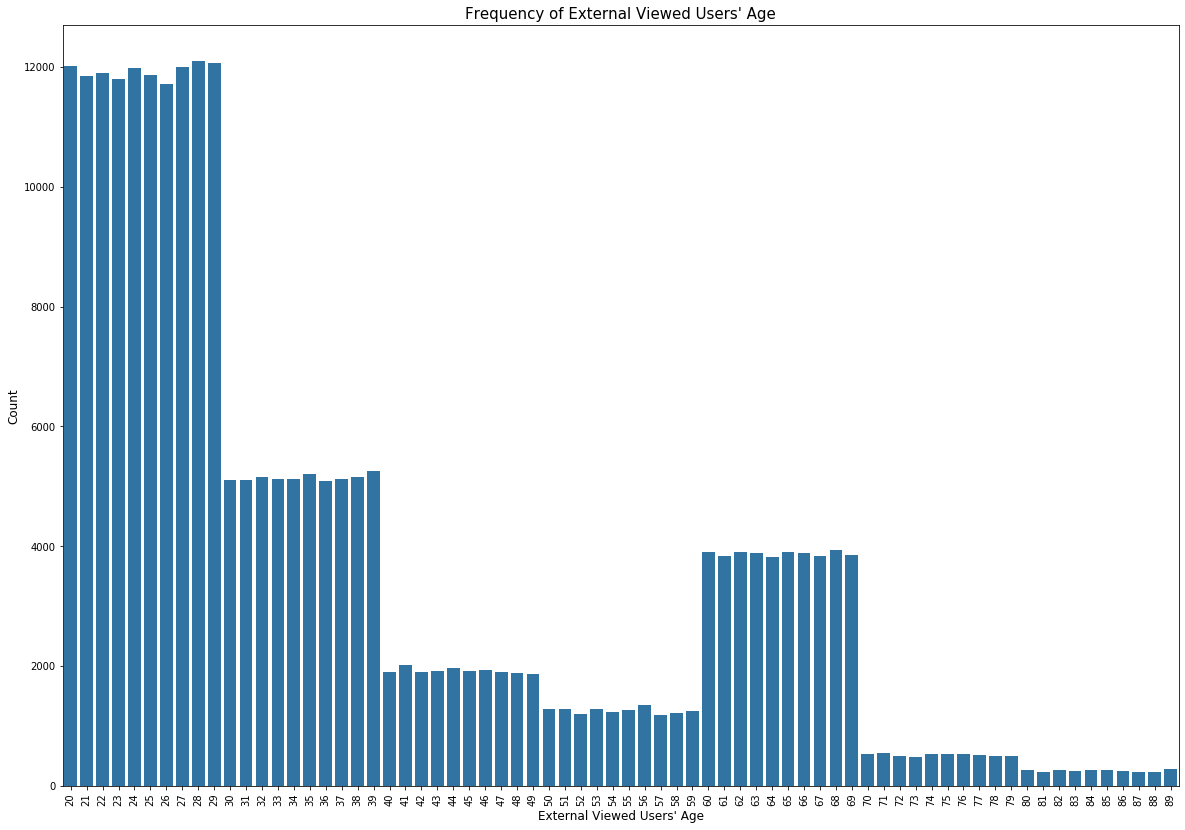

In [37]:
plt.figure(figsize=(20,14))
sns.countplot(x='age', data=ext_viewed_users,color=color[0])
plt.ylabel('Count', fontsize=12)
plt.xlabel('External Viewed Users\' Age', fontsize=12)
plt.xticks(rotation='vertical')
plt.title('Frequency of External Viewed Users\' Age', fontsize=15)
plt.show()

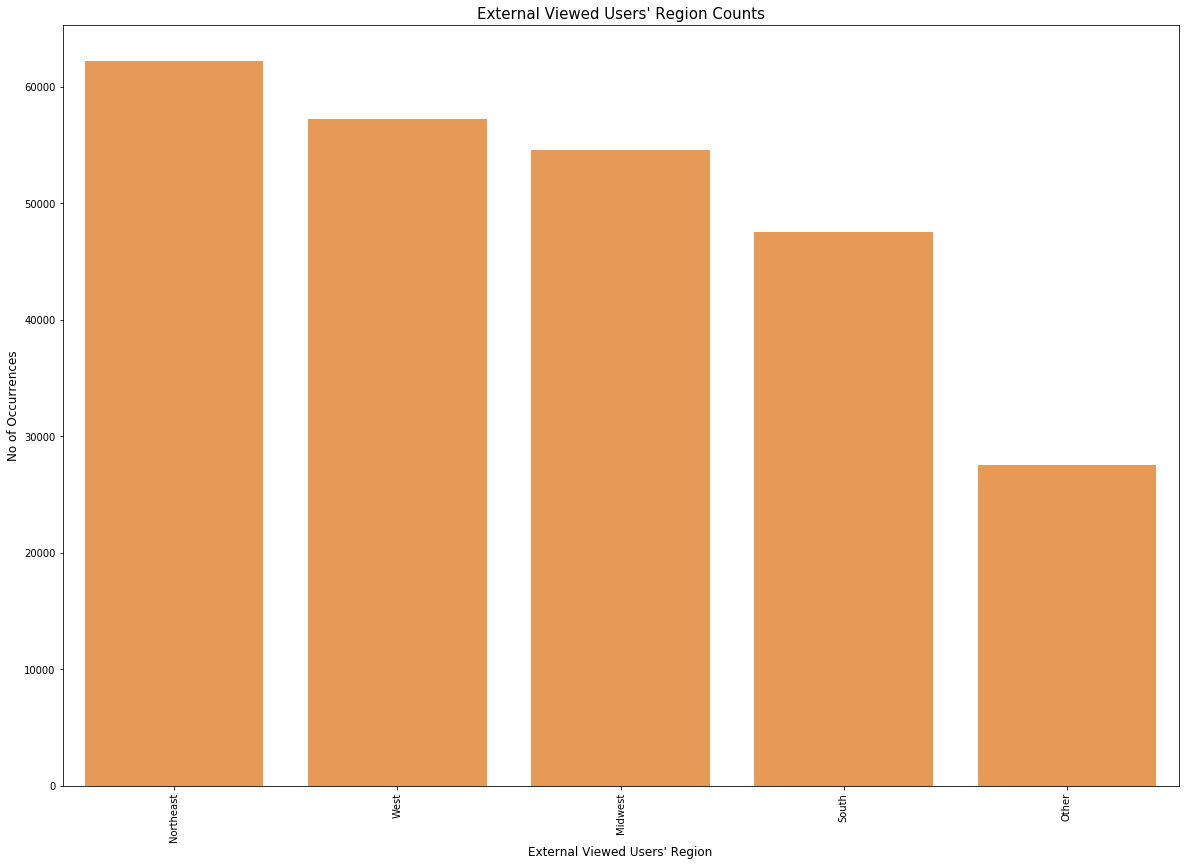

In [38]:
reg_cnt = ext_viewed_users.region.value_counts()

plt.figure(figsize = (20,14))
sns.barplot(reg_cnt.index, reg_cnt.values, alpha=0.8, color = color[1])
plt.ylabel('No of Occurrences', fontsize=12)
plt.xlabel('External Viewed Users\' Region', fontsize=12)
plt.title('External Viewed Users\' Region Counts', fontsize=15)
plt.xticks(rotation='vertical')
plt.show() 

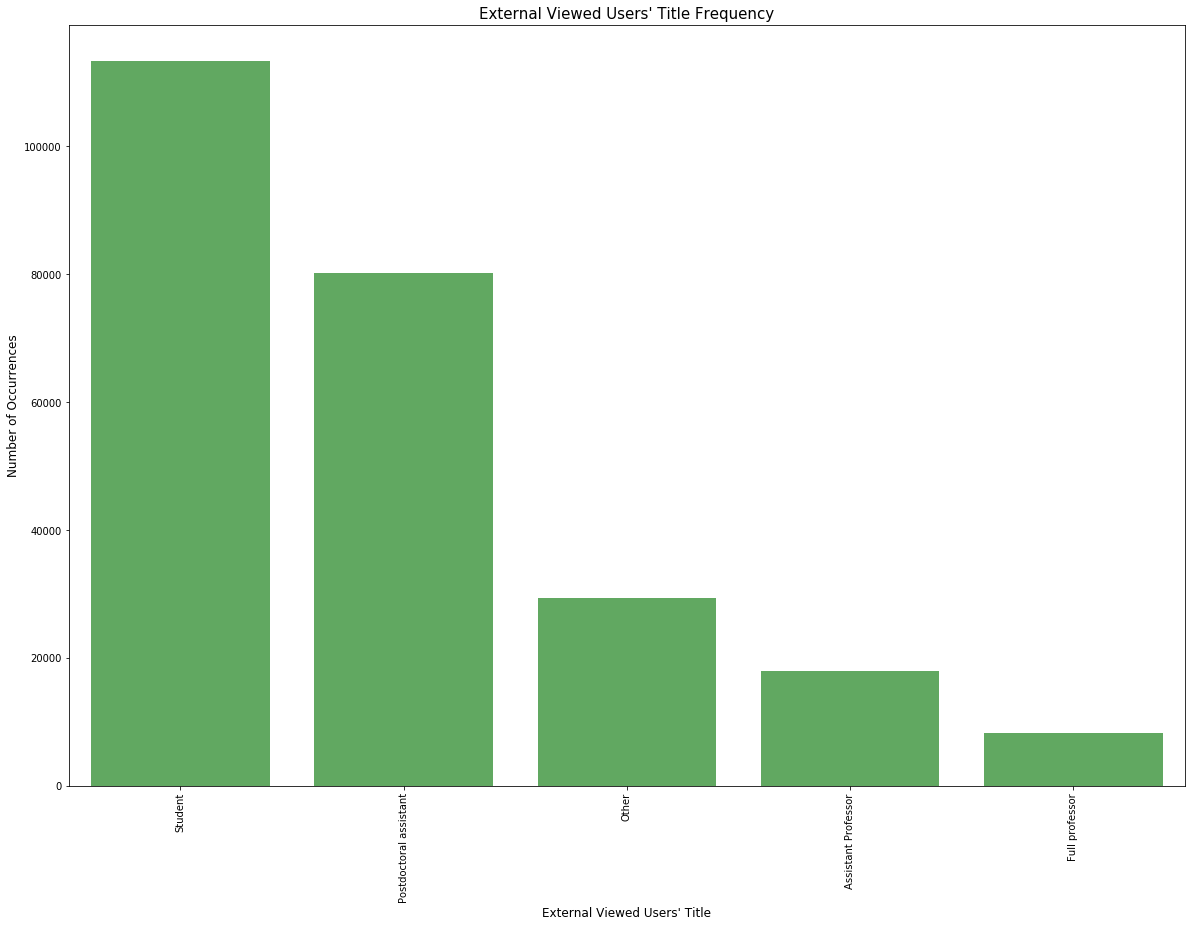

In [39]:
titles_cnt = ext_viewed_users.title.value_counts()

plt.figure(figsize=(20,14))
sns.barplot(titles_cnt.index, titles_cnt.values, alpha=0.8, color=color[2])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('External Viewed Users\' Title', fontsize=12)
plt.title('External Viewed Users\' Title Frequency', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

All demographics from external traffic users who viewed profiles were parallel to overall and users' demographic frequencies. This was interesting since a significantly less amount of users were in the cohort from internal users who viewed profiles. The difference was around 325,000. Due to this odd behavior, this will not be factored into ranking algorithm.

In order to wrap up questions proposed earlier based on two data trends I wanted to explore: There is a difference in demographics between users visiting profiles and visited profiles' users. Users' traits are more in line with overall demographics. And profile viewers coming from external traffic have similar traits to overall platform users as well as internal users looking at profiles. So the odd one out is users whose profiles are viewed. That is why cohort analysis had to be done to determine for viewed profile users what classes were dominant within each demographic trait.

## - The trends I observed would have an effect on how I build my ranking feature because whichever the age groups, region, titles and most profile views were of users whose profiles were visited will have higher weights given when creating ranking algorithm.

## For example, there will be increased weight for those users who are like the top 3 most visited users: 21-24 years of age, come from the South/Midwest/Northeast and are Full Professors as well as share traits that are in general what users are whose profiles were viewed: 20's (20, 21, 24, 27, 29), from the Midwest, Northeast as well as are Full Professors.

## -In general, there were no inconsistencies in the data that could affect how I build my ranking features since there were no NaN's and distributions in age, region and title were not skewed. This is a good question to ask though because with large datasets as such, there are often gaps in data and kurtosis.

## -One thing to note is that the only inconsistency was in how viewed profile user demographics between internal and external web traffic were different. However, external web traffic user base demographics will not be used in building my ranking feature as mentioned above. So it will not affect new product feature development.

## -The manner in which I would communicate my findings to a non-technical PM would be to speak to their KPI's/business concerns. For example, if I was speaking to someone who was in Marketing, I would speak to them about who to target advertisements to based on the cohort analysis I did in order to increase user engagement.

# b) The amount of web traffic that users' profiles are receiving from external sources is much higher than that which is received from internal sources. The highest number of hits for a user from external sources is 1124 whereas the highest number of hits from internal sources is 406. 

# It would not be reasonable to include both data sources in product feature since there would most likely be a lot of noise coming from external web traffic such as accidental profile visits. This would make it hard to create genuine user cohorts to target users to come back to platform with intention. When using internal source, already know that users are invested and therefore can define clear cohorts to keep interest on platform high.

# c) Ranking for Profile Views

1. To viewed_users table, add columns based on diff wt's : profile_wt, age_wt, title_wt, region_wt
    a) Features to look at: Profile Views> Age > Title > Region (Order based on heaviest weight bracket to lowest weight bracket) 
2. Add column : rank_value based on sum of all calculated weights
    a) Sort table based on rank_value column in descending order with highest rank_value at top of table
2. To same table, add column: profile_view_rank that ranks rank_value column from top to bottom starting with 1 (By default, equal values are assigned a rank that is the average of the ranks of those values)

In [40]:
#Original DF as a reminder
viewed_users.head()

,id_x,firstname,lastname,age,region,title_id,id_y,user_id_x,profile_url,id_x,title,id_y,user_id_y,viewed_user_id,created_at
0,10058,Nina,Loera,73,South,3,21,10058,/pub/nina-loera,3,Postdoctoral assistant,6680,4185263,10058,2014-01-01 10:26:22
1,10103,Veronica,Sauer,64,Midwest,3,60,10103,/pub/veronica-sauer,3,Postdoctoral assistant,5870,3162674,10103,2014-01-01 05:58:15
2,10419,Eric,Bender,37,South,1,301,10419,/cv/eric-bender,1,Full professor,3029,2252759,10419,2014-01-01 18:10:06
3,10419,Eric,Bender,37,South,1,301,10419,/cv/eric-bender,1,Full professor,1026,3341405,10419,2014-01-01 06:53:05
4,10610,Marc,Hickman,28,Northeast,3,449,10610,/pub/marc-hickman,3,Postdoctoral assistant,5436,1382250,10610,2014-01-01 03:24:49


In [41]:
def profile_wt (row):
   if row['viewed_user_id'] == 1740253 :
      return 200
   if row['viewed_user_id'] == 2185215 :
      return 200
   if row['viewed_user_id'] == 2632343 :
      return 200
   return 0

In [42]:
viewed_users['profile_wt'] = viewed_users.apply (lambda row: profile_wt(row), axis=1)

In [43]:
def age_wt (row):
   if row['age'] < 30 :
      return 100
   return 0

In [44]:
viewed_users['age_wt'] = viewed_users.apply (lambda row: age_wt(row), axis=1)

In [45]:
def title_wt (row):
   if row['title'] == 'Full professor' :
      return 50
   if row['title'] == 'Student' :
      return 25
   if row['title'] == 'Postdoctoral assistant' :
      return 10
   if row['title'] == 'Assistant Professor' :
      return 5
   if row['title'] == 'Other' :
      return 5

In [46]:
viewed_users['title_wt'] = viewed_users.apply (lambda row: title_wt(row), axis=1)

In [47]:
def region_wt (row):
   if row['region'] == 'Midwest' :
      return 25
   if row['region'] == 'Northeast' :
      return 20
   if row['region'] == 'South' :
      return 15
   if row['region'] == 'West' :
      return 10
   if row['region'] == 'Other' :
      return 5

In [48]:
viewed_users['region_wt'] = viewed_users.apply (lambda row: region_wt(row), axis=1)

In [49]:
viewed_users['rank_value'] = viewed_users['profile_wt'] + viewed_users['age_wt'] + viewed_users['title_wt'] + viewed_users['region_wt']

In [50]:
#Peek to see if all new columns have been added correctly
viewed_users.head()

,id_x,firstname,lastname,age,region,title_id,id_y,user_id_x,profile_url,id_x,title,id_y,user_id_y,viewed_user_id,created_at,profile_wt,age_wt,title_wt,region_wt,rank_value
0,10058,Nina,Loera,73,South,3,21,10058,/pub/nina-loera,3,Postdoctoral assistant,6680,4185263,10058,2014-01-01 10:26:22,0,0,10,15,25
1,10103,Veronica,Sauer,64,Midwest,3,60,10103,/pub/veronica-sauer,3,Postdoctoral assistant,5870,3162674,10103,2014-01-01 05:58:15,0,0,10,25,35
2,10419,Eric,Bender,37,South,1,301,10419,/cv/eric-bender,1,Full professor,3029,2252759,10419,2014-01-01 18:10:06,0,0,50,15,65
3,10419,Eric,Bender,37,South,1,301,10419,/cv/eric-bender,1,Full professor,1026,3341405,10419,2014-01-01 06:53:05,0,0,50,15,65
4,10610,Marc,Hickman,28,Northeast,3,449,10610,/pub/marc-hickman,3,Postdoctoral assistant,5436,1382250,10610,2014-01-01 03:24:49,0,100,10,20,130


In [51]:
#Sort rank_value in descending order
viewed_users_sort_rank_val = viewed_users.sort_values(by=['rank_value'], ascending=False)

In [52]:
#Another peek to see if sequence in rank_value is right
viewed_users_sort_rank_val.head(20)

,id_x,firstname,lastname,age,region,title_id,id_y,user_id_x,profile_url,id_x,title,id_y,user_id_y,viewed_user_id,created_at,profile_wt,age_wt,title_wt,region_wt,rank_value
5854,2185215,Adam,Towns,21,Midwest,1,309303,2185215,/pub/adam-towns,1,Full professor,443,833798,2185215,2014-01-01 03:37:52,200,100,50,25,375
5857,2185215,Adam,Towns,21,Midwest,1,309303,2185215,/pub/adam-towns,1,Full professor,2905,867290,2185215,2014-01-01 17:29:25,200,100,50,25,375
5868,2185215,Adam,Towns,21,Midwest,1,309303,2185215,/pub/adam-towns,1,Full professor,1408,988384,2185215,2014-01-01 09:01:38,200,100,50,25,375
5867,2185215,Adam,Towns,21,Midwest,1,309303,2185215,/pub/adam-towns,1,Full professor,4206,987932,2185215,2014-01-02 00:39:24,200,100,50,25,375
5866,2185215,Adam,Towns,21,Midwest,1,309303,2185215,/pub/adam-towns,1,Full professor,3952,979717,2185215,2014-01-01 23:12:13,200,100,50,25,375
6027,2185215,Adam,Towns,21,Midwest,1,309303,2185215,/pub/adam-towns,1,Full professor,501,2709031,2185215,2014-01-01 03:55:09,200,100,50,25,375
5865,2185215,Adam,Towns,21,Midwest,1,309303,2185215,/pub/adam-towns,1,Full professor,545,969197,2185215,2014-01-01 04:08:58,200,100,50,25,375
5864,2185215,Adam,Towns,21,Midwest,1,309303,2185215,/pub/adam-towns,1,Full professor,2740,963217,2185215,2014-01-01 16:36:17,200,100,50,25,375
5863,2185215,Adam,Towns,21,Midwest,1,309303,2185215,/pub/adam-towns,1,Full professor,3525,962925,2185215,2014-01-01 20:50:20,200,100,50,25,375
5862,2185215,Adam,Towns,21,Midwest,1,309303,2185215,/pub/adam-towns,1,Full professor,2214,947354,2185215,2014-01-01 13:36:25,200,100,50,25,375


In [53]:
#Drop duplicated viewed_user_id
viewed_users_no_dup = viewed_users_sort_rank_val.drop_duplicates(subset=['viewed_user_id'])
viewed_users_no_dup.head()

,id_x,firstname,lastname,age,region,title_id,id_y,user_id_x,profile_url,id_x,title,id_y,user_id_y,viewed_user_id,created_at,profile_wt,age_wt,title_wt,region_wt,rank_value
5854,2185215,Adam,Towns,21,Midwest,1,309303,2185215,/pub/adam-towns,1,Full professor,443,833798,2185215,2014-01-01 03:37:52,200,100,50,25,375
4476,1740253,Tommy,Proulx,20,Northeast,1,249231,1740253,/cv/tommy-proulx,1,Full professor,504,524816,1740253,2014-01-01 03:56:04,200,100,50,20,370
7160,2632343,Diane,Holland,24,South,1,368921,2632343,/pub/diane-holland,1,Full professor,3367,1904241,2632343,2014-01-01 19:57:10,200,100,50,15,365
4311,1682751,Kimberly,Wright,24,Midwest,1,239088,1682751,/pub/kimberly-wright,1,Full professor,2055,43858,1682751,2014-01-01 12:44:40,0,100,50,25,175
3215,1287442,Edna,Castillo,29,Midwest,1,180917,1287442,/pub/edna-castillo,1,Full professor,1244,212301,1287442,2014-01-01 08:07:40,0,100,50,25,175


In [54]:
#Add last column: profile_view_rank
viewed_users_no_dup['profile_view_rank'] = viewed_users_no_dup['rank_value'].rank(ascending=False)

In [55]:
#Final - Reminder: By default, equal rank values are assigned a rank that is the average of the ranks of those values. Hence, there is a 63.5 ranking.
viewed_users_no_dup.head()

,id_x,firstname,lastname,age,region,title_id,id_y,user_id_x,profile_url,id_x,...,id_y,user_id_y,viewed_user_id,created_at,profile_wt,age_wt,title_wt,region_wt,rank_value,profile_view_rank
5854,2185215,Adam,Towns,21,Midwest,1,309303,2185215,/pub/adam-towns,1,...,443,833798,2185215,2014-01-01 03:37:52,200,100,50,25,375,1.0
4476,1740253,Tommy,Proulx,20,Northeast,1,249231,1740253,/cv/tommy-proulx,1,...,504,524816,1740253,2014-01-01 03:56:04,200,100,50,20,370,2.0
7160,2632343,Diane,Holland,24,South,1,368921,2632343,/pub/diane-holland,1,...,3367,1904241,2632343,2014-01-01 19:57:10,200,100,50,15,365,3.0
4311,1682751,Kimberly,Wright,24,Midwest,1,239088,1682751,/pub/kimberly-wright,1,...,2055,43858,1682751,2014-01-01 12:44:40,0,100,50,25,175,63.5
3215,1287442,Edna,Castillo,29,Midwest,1,180917,1287442,/pub/edna-castillo,1,...,1244,212301,1287442,2014-01-01 08:07:40,0,100,50,25,175,63.5


## I would present the profile view data for a "Rank for Profile Views" feature by starting with the business objective, go into the new product feature proposal and how it fits with business objective, my plan for implementing new feature, why my plan is designed as such and remind the audience how data from the past can predict future user engagement.

## Lastly, future proposal for ranking system meant to increase engagement and interaction:

## Instead of drawing users on platform via viral/network effects, can base ranks on relevancy and recency. Based on information retrieval and relevancy methods, there are different algorithms to present ranked results. To keep on improving on how to rank profiles, new ranking systems can be evaluated via A/B testing to see how different algorithms work out (does it increase engagement on platform or not).